In [4]:
import matplotlib.pyplot as plt
import numpy as np


from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell1D.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')


from utils import decorate, savefig
# make a directory for figures
!mkdir -p figs

In [5]:
import itertools
from scipy.signal import correlate2d
from Cell2D import Cell2D, draw_array

class SandPile(Cell2D):
    """Diffusion Cellular Automaton."""

    kernel = np.array([[0, 1, 0],
                       [1,-4, 1],
                       [0, 1, 0]], dtype=np.int32)

    def __init__(self, n, m=None, level=9):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        level: starting value for all cells
        """
        m = n if m is None else m
        self.array = np.ones((n, m), dtype=np.int32) * level
        self.toppled_seq = []

    def step(self, K=3):
        """Executes one time step.
        
        returns: number of cells that toppled
        """
        toppling = self.array > K
        num_toppled = np.sum(toppling)
        self.toppled_seq.append(num_toppled)

        c = correlate2d(toppling, self.kernel, mode='same')
        self.array += c
        return num_toppled
    
    def drop(self):
        """Increments a random cell."""
        a = self.array
        n, m = a.shape
        index = np.random.randint(n), np.random.randint(m)
        a[index] += 1
    
    def run(self):
        """Runs until equilibrium.
        
        returns: duration, total number of topplings
        """
        total = 0
        for i in itertools.count(1):
            num_toppled = self.step()
            total += num_toppled
            if num_toppled == 0:
                return i, total

    def drop_and_run(self):
        """Drops a random grain and runs to equilibrium.
        
        returns: duration, total_toppled
        """
        self.drop()
        duration, total_toppled = self.run()
        return duration, total_toppled
    
    def draw(self):
        """Draws the cells."""
        draw_array(self.array, cmap='YlOrRd', vmax=5)

In [8]:
np.random.seed(128)

iters = 100000
%time 
res = [pile2.drop_and_run() for _ in range(iters)]


T, S = np.transpose(res)


NameError: name 'pile2' is not defined

NameError: name 'res' is not defined

In [7]:
#!pip install empiricaldist

from empiricaldist import Cdf

cdf = Cdf.from_seq(S)

  Preparing metadata (setup.py) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.3-py3-none-any.whl size=10545 sha256=1886e596ebf9b597187c409ad693f57b6b8f525e8d1b0f969f5c83ab3f0ae22d
  Stored in directory: /Users/jaleesastringfellow/Library/Caches/pip/wheels/f4/48/c1/603790e9696a1e2dd56c1e2a306d47379f02d8c75750645f02
Successfully built empiricaldist


NameError: name 'S' is not defined

In [12]:

def plot_cdf(series, label, xlabel):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    cdf = Cdf.from_seq(S)
    cdf.step(label=label)
    decorate(xlabel=xlabel,
             ylabel='Cdf',
             xscale='log')

    plt.subplot(1, 2, 2)

    (1-cdf).plot(label=label)
    decorate(xlabel=xlabel,
             xscale='log',
             yscale='log')

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


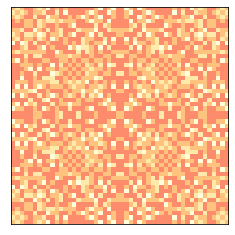

In [19]:
pile2 = SandPile(n=50, level=30)
pile2.run()
pile2.draw()


np.random.seed(50)

iters = 1000
%time 
res = [pile2.drop_and_run() for _ in range(iters)]



In [20]:
T, S = np.transpose(res)

In [21]:
T = T[T>1]
S = S[S>0]

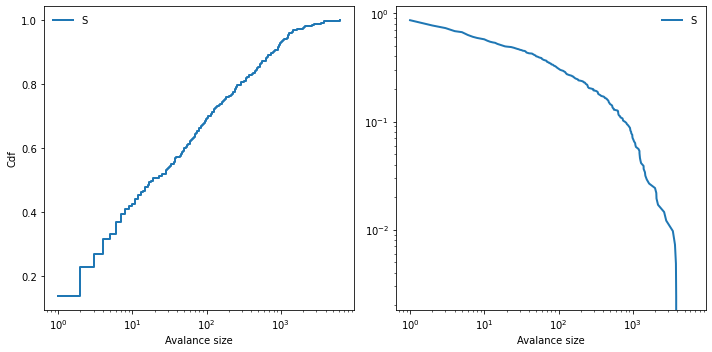

In [22]:
plot_cdf(S, 'S', xlabel='Avalance size')

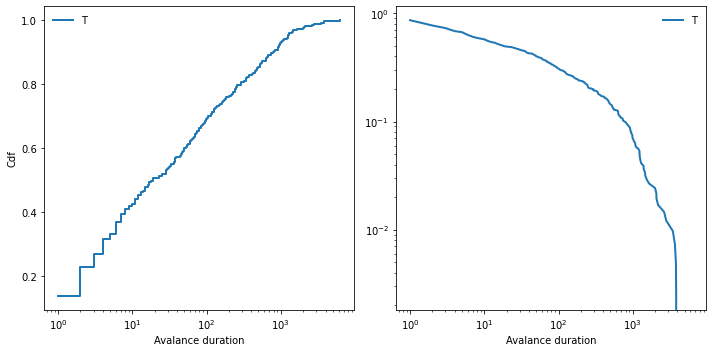

In [23]:
plot_cdf(T, 'T', xlabel='Avalance duration')

In [25]:

def draw_four(pile, levels=range(4)):
    plt.figure(figsize=(8, 8))
    for i, level in enumerate(levels):
        plt.subplot(2, 2, i+1)
        draw_array(pile.array==level, cmap='YlOrRd', vmax=1)
    
    plt.tight_layout()
    
    

In [ ]:
pile4 = SandPile(n=128, level=14)
pile4.run()
draw_four(pile4)



for i in range(1000):
    pile4.drop_and_run()
    
draw_four(pile4)

dims = box_count_four(pile4)

for i, dim in enumerate(dims):
    print('%d  %0.3f' % (i, dim))


In [ ]:
def single_source(pile, height=1024):
    """Adds a tower to the center cell.
    
    height: value assigned to the center cell
    """
    a = pile.array
    n, m = a.shape
    a[:, :] = 0
    a[n//2, m//2] = height
    
    
    
def run_ss_pile(n, k=10):
    """Runs a single source model.
    
    k: integer power of two of height
    """
    pile = SandPile(n)
    single_source(pile, 2**k)
    print(pile.run())        
    return pile

In [ ]:
pile5 = run_ss_pile(n=128, k=14)
pile5.draw()

draw_four(pile5)

dims = box_count_four(pile5)

for i, dim in enumerate(dims):
    print('%d  %0.3f' % (i, dim))